In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_csv('../input/edos-1m/EDOS 1M.csv')

dataset_percentage = 1
if dataset_percentage < 1:
    dataset = dataset.sample(n=int(len(dataset)*dataset_percentage))

X,y = dataset["uttr"], dataset["eb+_emot"]

print(X.head(5))
print(type(X), end="\n\n")
print(y.head(5))
print(type(y), end="\n\n")

classes = y.unique()
classes

0    You moron ! What fool washes diapers by the we...
1                                   You useless fool !
2                                 How dare you sleep !
3                        Up ! Go and clean the house .
4                                  Clean the kitchen .
Name: uttr, dtype: object
<class 'pandas.core.series.Series'>

0       angry
1     furious
2     furious
3    prepared
4    prepared
Name: eb+_emot, dtype: object
<class 'pandas.core.series.Series'>



array(['angry', 'furious', 'prepared', 'acknowledging', 'trusting',
       'confident', 'hopeful', 'caring', 'sentimental', 'anticipating',
       'wishing', 'surprised', 'ashamed', 'questioning', 'sad',
       'nostalgic', 'devastated', 'terrified', 'embarrassed', 'lonely',
       'encouraging', 'suggesting', 'content', 'afraid', 'impressed',
       'agreeing', 'apprehensive', 'proud', 'annoyed', 'anxious',
       'grateful', 'excited', 'neutral', 'faithful', 'guilty',
       'consoling', 'disgusted', 'disappointed', 'jealous', 'joyful',
       'sympathizing'], dtype=object)

# Preparation

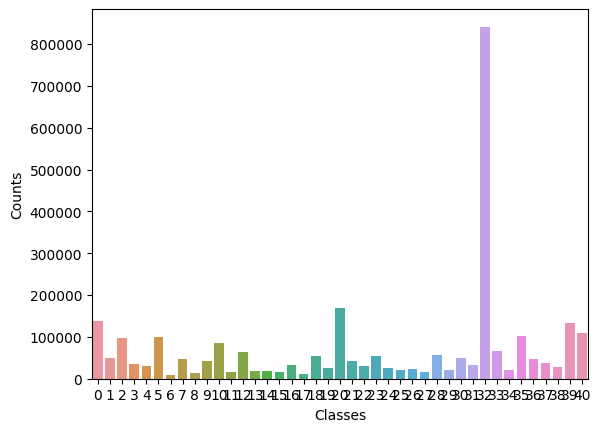

In [3]:
# plot classes distribution
counts = pd.get_dummies(y).sum()

plt.ylabel('Counts')
plt.xlabel('Classes')
sns.barplot(x = [i for i in range(len(classes))], y = counts)
plt.show()

In [4]:
# train, validation and test split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, stratify=y)

print("train size: ", len(train_X))
print("validation size: ", len(valid_X))

train size:  1980598
validation size:  848828


# Single utterance classification - Baseline model

In [5]:
# vectorize the text using word count
vectorizer = CountVectorizer(min_df=5, stop_words='english')
vectorizer.fit(train_X)
print("Vocabulary length: " + str(len(vectorizer.get_feature_names_out())))
print("First words: " + str(vectorizer.get_feature_names_out()[:200]))

train_X_vector = vectorizer.transform(train_X)
valid_X_vector = vectorizer.transform(valid_X)

Vocabulary length: 48430
First words: ['00' '000' '001' '007' '00am' '00pm' '01' '02' '03' '04' '05' '06' '0600'
 '07' '0700' '08' '0800' '09' '0900' '0f' '0h' '0k' '0kay' '0n' '0ne'
 '0nly' '0r' '0th' '0ur' '0ut' '10' '100' '1000' '10000' '100000' '1001'
 '100m' '100s' '100th' '101' '101st' '102' '103' '104' '104th' '105' '106'
 '107' '108' '109' '10am' '10k' '10pm' '10s' '10th' '11' '110' '1100'
 '111' '112' '113' '114' '115' '116' '117' '118' '119' '11am' '11th' '12'
 '120' '1200' '121' '122' '123' '124' '125' '127' '128' '12th' '13' '130'
 '1300' '132' '133' '134' '135' '13th' '14' '140' '1400' '141' '142' '143'
 '144' '145' '147' '148' '14k' '14th' '15' '150' '1500' '152' '155' '156'
 '157' '15am' '15th' '16' '160' '1600' '161' '165' '16th' '17' '170'
 '1700' '1700s' '174' '175' '178' '17th' '18' '180' '1800' '1800s' '182'
 '184' '185' '1857' '1860' '1862' '1875' '1890' '1896' '18th' '19' '190'
 '1900' '1900s' '1901' '1903' '1904' '1905' '1906' '1908' '1910' '1911'
 '1912' '1913' 

In [6]:
# going for SVMs since they're usually reliable with high dimensional data
model = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-5, max_iter=5, tol=None)
model.fit(train_X_vector, train_y)

SGDClassifier(alpha=1e-05, max_iter=5, tol=None)

In [7]:
# validate the model
pred_y = model.predict(valid_X_vector)

print('Results for the basic SVM classifier:')
print(classification_report(valid_y, pred_y, target_names=classes))

Results for the basic SVM classifier:
               precision    recall  f1-score   support

        angry       0.47      0.27      0.34     41449
      furious       0.57      0.58      0.57     14785
     prepared       0.38      0.19      0.26     28969
acknowledging       0.43      0.16      0.23     10477
     trusting       0.33      0.16      0.21      9022
    confident       0.50      0.43      0.46     30130
      hopeful       0.51      0.31      0.39      2573
       caring       0.27      0.15      0.19     14018
  sentimental       0.31      0.21      0.25      4439
 anticipating       0.28      0.12      0.16     12842
      wishing       0.37      0.16      0.22     25475
    surprised       0.21      0.21      0.21      5177
      ashamed       0.50      0.37      0.43     19371
  questioning       0.34      0.18      0.24      5262
          sad       0.38      0.26      0.31      5489
    nostalgic       0.55      0.39      0.46      4521
   devastated       0.63  